In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import pandas as pd
import autograd.numpy as np
from autograd import grad

matplotlib.__version__

'3.7.0'

In [22]:
# Load data:
data = np.loadtxt("techSalaries2017.csv", delimiter=",", dtype=str, quotechar='"')
data = np.delete(data,0,0)
print(data.shape)
#print(data[0:6,:])

(62642, 27)


In [23]:
mask = np.any(data == 'NA', axis=1)  # Create mask to identify rows containing "NA"
data = data[~mask]  # Use boolean indexing to select rows that don't contain "NA"
mask = np.any(data == 'Other', axis=1)
data = data[~mask]
data = np.where(data == 'Female', '1', data)
data = np.where(data == 'Male', '0', data)
print(data.shape)
print(data[0:6,:])

(21483, 27)
[['Google' 'Software Engineer' 'Sunnyvale, CA' '400000' '210000' '145000'
  '45000' '5' '5' '0' '0' '0' '1' '0' '0' '1' '0' '0' '0' '0' 'Asian'
  'PhD' '45' '68.891' '9' '1166' '3.04']
 ['Microsoft' 'Software Engineer' 'Redmond, WA' '136000' '124000' '1000'
  '11000' '3' '2' '0' '0' '1' '0' '0' '0' '0' '0' '1' '0' '0'
  'Two Or More' "Bachelor's Degree" '24' '61.454' '12' '1175' '3.07']
 ['Google' 'Software Engineer' 'San Bruno, CA' '337000' '177000' '125000'
  '36000' '6' '6' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' 'Asian'
  "Bachelor's Degree" '25' '65.455' '1' '1268' '3.34']
 ['Microsoft' 'Software Engineer' 'Seattle, WA' '222000' '164000' '38000'
  '20000' '4' '4' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' 'Asian'
  "Master's Degree" '32' '73.769' '8' '1070' '2.75']
 ['Blend' 'Software Engineer' 'San Francisco, CA' '187000' '165000'
  '22000' '0' '5' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' 'White'
  "Bachelor's Degree" '29' '68.71' '2' '1187' '3.23']
 ['Ama

In [24]:
string_columns = [0,1,2,4,5,6,20,21]
data1= np.delete(data,string_columns,1)
print(data1.shape)
print(data1.dtype)

(21483, 19)
<U41


In [25]:
data1=data1.astype("float")
print(data1.dtype)
np.set_printoptions(suppress=True)
print(data1[0:5,:])

float64
[[400000.         5.         5.         0.         0.         0.
       1.         0.         0.         1.         0.         0.
       0.         0.        45.        68.891      9.      1166.
       3.04 ]
 [136000.         3.         2.         0.         0.         1.
       0.         0.         0.         0.         0.         1.
       0.         0.        24.        61.454     12.      1175.
       3.07 ]
 [337000.         6.         6.         0.         0.         1.
       0.         0.         0.         1.         0.         0.
       0.         0.        25.        65.455      1.      1268.
       3.34 ]
 [222000.         4.         4.         0.         1.         0.
       0.         0.         0.         1.         0.         0.
       0.         0.        32.        73.769      8.      1070.
       2.75 ]
 [187000.         5.         0.         0.         0.         1.
       0.         0.         0.         0.         1.         0.
       0.         0.      

(21483, 16)
0.26511813241853877
Coefficients: [ 0.38707084 -0.05777145 -0.01406849  0.10274219  0.02021906  0.1509795
 -0.00531938  0.00328148  0.01626704  0.02046387 -0.00159536 -0.00300643
 -0.00561355  0.01259592  0.25736257  0.01593435]
0.16088648698739694


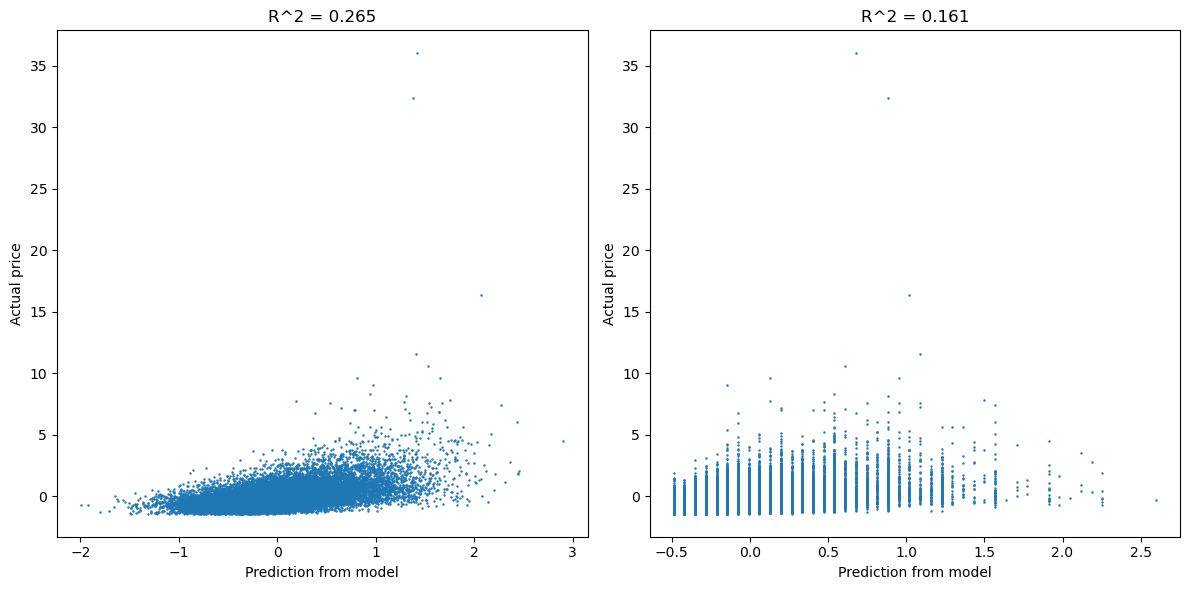

In [26]:
included_columns = [i for i in range(data1.shape[1]) if i not in [0,8,13]]
x1=data1[:,included_columns]
print(x1.shape)
y=data1[:,0]
#print(y[0:5])
x_norm = (x1 - np.mean(x1, axis=0))/np.std(x1, axis=0)
y_norm = (y - np.mean(y, axis=0))/np.std(y, axis=0)
model = LinearRegression().fit(x_norm,y_norm)
rSqr = model.score(x_norm,y_norm)
print(rSqr)
print("Coefficients:", model.coef_)
fig = plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
yHat = model.predict(x_norm)
plt.plot(yHat,y_norm,'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual price')  
plt.title('R^2 = {:.3f}'.format(rSqr))
plt.tight_layout()

x2=x_norm[:,0]
model = LinearRegression().fit(x2.reshape(-1,1),y_norm)
rSqr = model.score(x2.reshape(-1,1),y_norm)
print(rSqr)
plt.subplot(1,2,2)
yHat = model.predict(x2.reshape(-1,1))
plt.plot(yHat,y_norm,'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual price')  
plt.title('R^2 = {:.3f}'.format(rSqr))
plt.tight_layout()

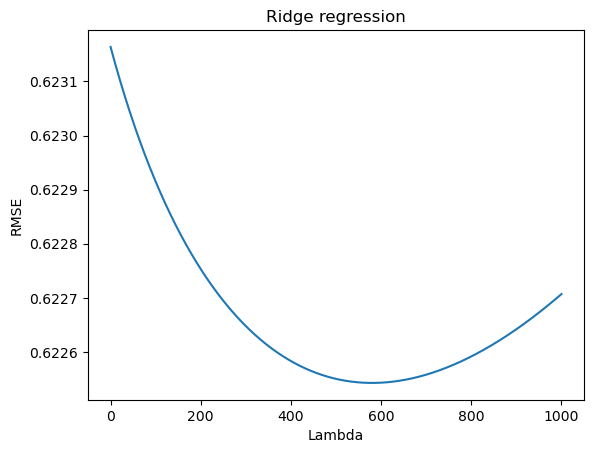

Optimal lambda: 579.9004201
R-square: 0.2852460576356033
Coefficients: [[ 0.27253755 -0.01941104 -0.03567256  0.03084844 -0.0645976   0.1086682
  -0.01038744  0.00358483  0.0033343   0.0124649  -0.01080356  0.03722558
  -0.00369071  0.00536476  0.18828219  0.08330809]]


In [27]:
lambdas = np.linspace(0.001,1000,10001)
cont = np.empty([len(lambdas),2])*np.NaN # [lambda error]
xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x_norm, y_norm.reshape(-1,1), test_size=0.2, random_state=5)
for ii in range(len(lambdas)):
    ridgeModel = Ridge(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = metrics.mean_squared_error(yTest,ridgeModel.predict(xTest))
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Ridge regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])
ridgeModel = Ridge(alpha=lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))]).fit(xTest, yTest)
rSqr = ridgeModel.score(xTest,yTest)
print("R-square:",rSqr)
print("Coefficients:", ridgeModel.coef_)

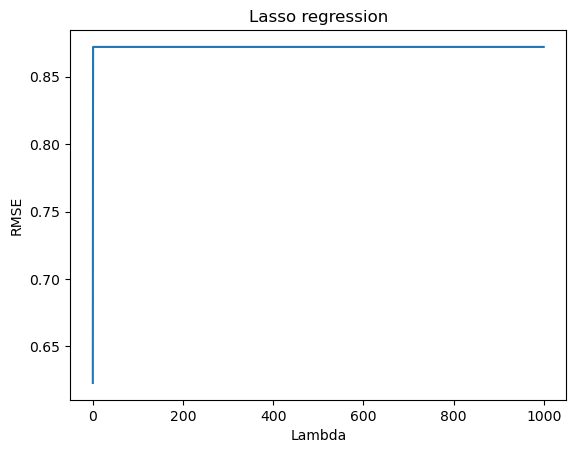

Optimal lambda: 0.001
R-square: 0.2899596639558034
Coefficients: [ 0.34163052 -0.04986201 -0.03685563  0.05850841 -0.03552603  0.13281846
 -0.00524186  0.00329497  0.          0.01336999 -0.00897542  0.00694996
 -0.00190728  0.00678493  0.27214542  0.01212347]


In [8]:
lambdas = np.linspace(0.001,1000,10001)
cont = np.empty([len(lambdas),2]) # [lambda error]
xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x_norm, y_norm.reshape(-1,1), test_size=0.2, random_state=5)
for ii in range(len(lambdas)):
    lassoModel = Lasso(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = metrics.mean_squared_error(yTest,lassoModel.predict(xTest))
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Lasso regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])
lassoModel = Lasso(alpha=lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))]).fit(xTest, yTest)
rSqr = lassoModel.score(xTest,yTest)
print("R-square:",rSqr)
print("Coefficients:", lassoModel.coef_)

In [28]:
import autograd.numpy as numpy
import autograd.numpy.random as npr

from autograd import elementwise_grad

import scipy.optimize
from tqdm import tqdm

In [29]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def logistic_unit(x, w, b):
    """This function computes logistic unit as defined $p_{+}$ above
    :param x: input x with n_dim features
    :param w: weght vector
    :param b: bias vector
    """
    pre_sigmoid = x @ w + b
    logit = sigmoid(pre_sigmoid)
    
    return logit

In [30]:
NEAR_ZERO = 1e-12

def loss_function(x, y, w, b):
    """This function computes the loss (distance)
    :param logits: output from logistic unit
    :param labels: target label
    """
    logits = logistic_unit(x,w,b)
    labels = y
    
    loss = -(labels * numpy.log(logits + NEAR_ZERO) + (1 - labels) * numpy.log(1 - logits + NEAR_ZERO))
    
    return loss

In [31]:
xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x_norm[:,0].reshape(-1,1), data1[:,3].reshape(-1,1), test_size=0.8, random_state=5)


In [32]:
# sanity check
w0 = 0.01 * numpy.random.randn(1)
b0 = 0.0

inp = xTrain[0]
label = yTrain[0]

out = logistic_unit(inp, w0, b0)


loss = loss_function(inp, label, w0, b0)
print(loss)

[0.69473041]


In [33]:
loss_grad_w = elementwise_grad(loss_function, 2) # partial derivative wrt the weights w (3rd input)
loss_grad_b = elementwise_grad(loss_function, 3) # partial derivative wrt the bias b (4th input)

In [52]:
n_iter = 1000
eta = .0001   # Learning rate
w0 = 0.01 * numpy.random.randn(1)
b0 = 0.0
w = numpy.copy(w0)
b = numpy.copy(b0)
loss_log = []


for ni in tqdm(range(n_iter)):
    dw = loss_grad_w(xTrain,yTrain, w, b)
    db = loss_grad_b(xTrain, yTrain, w, b)
    w -= eta * dw
    b -= eta * db
    
    loss = numpy.mean(loss_function(xTrain, yTrain, w, b))
    loss_log.append(loss)
    
print(w)

100%|██████████| 200/200 [02:49<00:00,  1.18it/s]

[0.05882806]


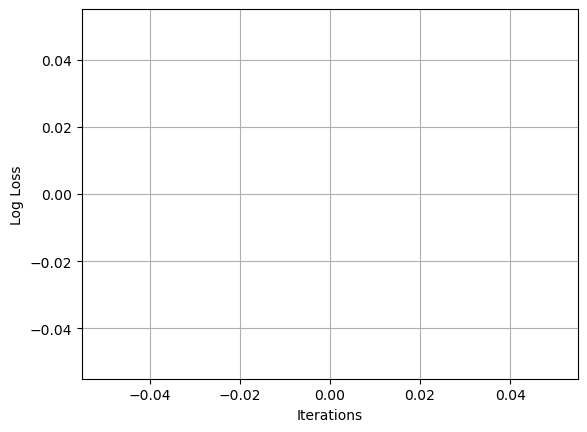

In [34]:
plt.figure()
plt.plot(loss_log)
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.grid(True)
plt.show()

In [45]:
print(data1[0:5,0])

[400000. 136000. 337000. 222000. 187000.]


In [46]:
median_value = np.median(data1[:,0])
mask = data1[:,0] > median_value  # Change to '<' if you want values smaller than median
data1[mask, 0] = 1  # Replace values larger than median with 1
data1[~mask, 0] = 0  # Replace values smaller than median with 0
print(data1[0:5,0])

[1. 0. 1. 1. 1.]


In [ ]:
xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x_norm[:,1].reshape(-1,1), data1[:,0].reshape(-1,1), test_size=0.8, random_state=5)
#xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x_norm[:,14].reshape(-1,1), data1[:,0].reshape(-1,1), test_size=0.8, random_state=5)
#xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x_norm[:,15].reshape(-1,1), data1[:,0].reshape(-1,1), test_size=0.8, random_state=5)
#xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x_norm[:,17].reshape(-1,1), data1[:,0].reshape(-1,1), test_size=0.8, random_state=5)
#xTrain, xTest, yTrain, yTest = model_selection.train_test_split(x_norm[:,18].reshape(-1,1), data1[:,0].reshape(-1,1), test_size=0.8, random_state=5)

In [ ]:
n_iter = 200
eta = .0001   # Learning rate
w0 = 0.01 * numpy.random.randn(1)
b0 = 0.0
w = numpy.copy(w0)
b = numpy.copy(b0)
loss_log = []


for ni in tqdm(range(n_iter)):
    dw = loss_grad_w(xTrain,yTrain, w, b)
    db = loss_grad_b(xTrain, yTrain, w, b)
    w -= eta * dw
    b -= eta * db
    
    loss = numpy.mean(loss_function(xTrain, yTrain, w, b))
    loss_log.append(loss)
    
print(w)

In [ ]:
plt.figure()
print(loss_log)
#plt.plot(loss_log)
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.grid(True)
plt.show()

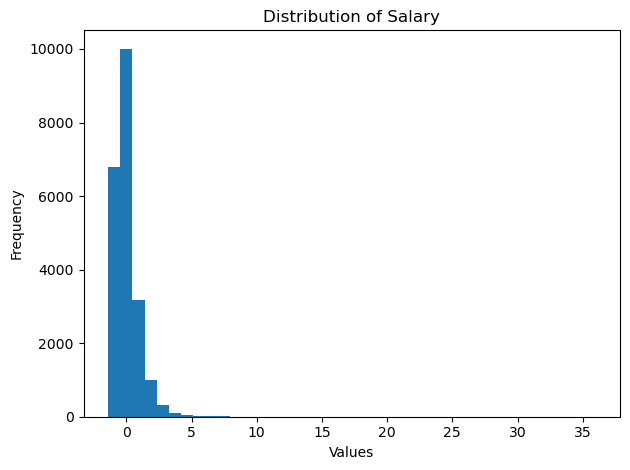

In [35]:
plt.hist(y_norm, bins=40)  
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Salary')
plt.tight_layout()
plt.show()

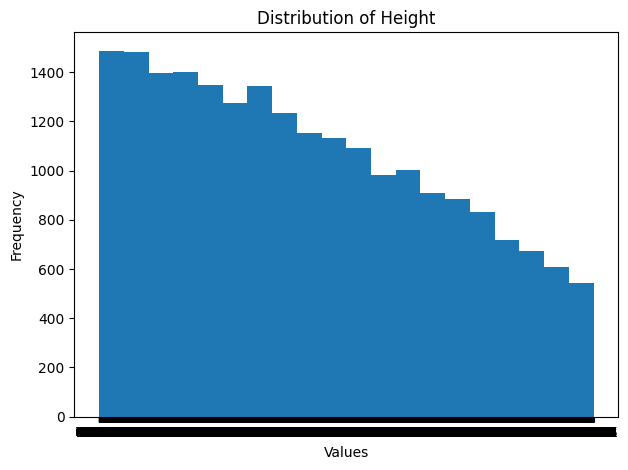

In [67]:
plt.hist(data[:,23], bins=20)  
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Height')
plt.tight_layout()
plt.show()

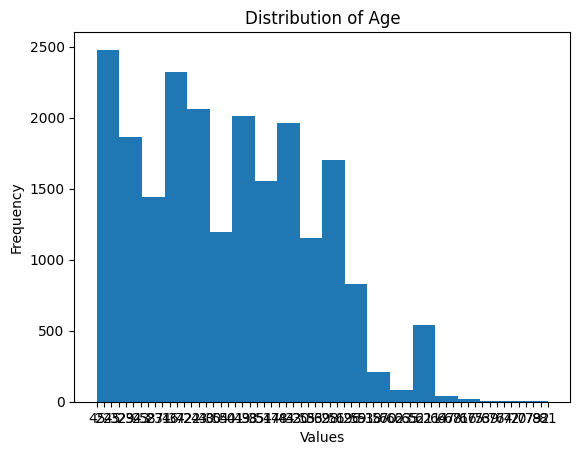

In [70]:
plt.hist(data[:,22], bins=20)  
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()